# BIOS 534 Machine Learning

This notebook summarizes the workflow presented in Lecture 16 which introduced scikit-learn. You could (and should) experiment with different scikit estimators. By this, I mean rather than using Linear Regression you could maybe use Ridge, Lasso, or ElasticNet Regression. You can always check the [scikit home page](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) for information about what is available for your area of interest 


## 1) Get Some Data

Here we will work with the very simple data set mtcars which has 32 rows and 11 columns

In [35]:
import pandas as pd
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

print(mtcars.head(),"\n")

    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2 



## 2) Determine What You Wish to Predict

In many cases you will be told what to predict. However, in the so called real world it will be part of your job to make this determination based on exploratory data analysis in combination with some stated objective. Here we will be predicting the miles per gallon of cars.

Text(0, 0.5, 'Miles Per Gallon')

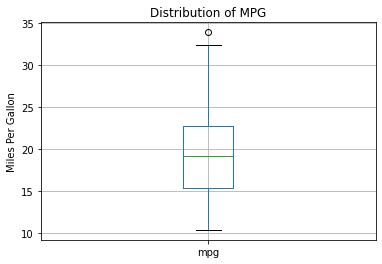

In [36]:
mtcars.boxplot('mpg')
import matplotlib.pyplot as plt
plt.title("Distribution of MPG")
plt.ylabel("Miles Per Gallon")

## 3) Decide on the Approach (Regression)

In this case it will be regression since **mpg** is a continuous quanity. There are many types of regression, but we'll stick with Linear regression for now. 

## 4) Linear Regression

We could go ahead an setup a model if we wanted. We haven't spearated the data yet so this is more in prepration for fitting the model. 

In [73]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression()
lm_model

LinearRegression()

## 5) Separate the data into X (predictors) and y (target)

This might depend on the original format of the data. In this case we have pandas data frame by virtue of the fact that we used a Pandas function to read in the CSV data. However, many of the scikit-learn estiamtors expect a numpy type array structure as opposed to data frames. As mentioned in class, the convention with scikit is to separate the predictors in a strcture called **X** and the target into a structure called **y**.

In [74]:
# Strip out the predictors. For now we use all columns except the target of course
X = mtcars.drop('mpg',axis=1).to_numpy()

# Strip out the target into "y"
y = mtcars.mpg.to_numpy()

## 6) Create a Training and Test pair on the X and y data

This is easy using the scikit-learn functions


In [75]:
from sklearn.model_selection import train_test_split

# This creates an 80 / 20 training testing pair. 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.20,
                                                    random_state=1)

print("Training set has dimensions of:",X_train.shape,"and Testing set has dimensions of",y_train.shape,"\n")

Training set has dimensions of: (25, 10) and Testing set has dimensions of (25,) 



## 7) Decide on a Performance Metric 

So since we are doing Regression in this case, we could choose Root Mean Sqaured Error. scikit-learn has a number of scoring methods so we don't have to write our own functions to do this. 

Sometimes though, the scoring methods implemented in scikit have to be manipulated to get what you want. 

But worry about that for later. You will notice that we import the **mean_squared_error** function below which has an argument ("squared") that if set to **True** will take the square root of the result thus giving us the RMSE.

In [76]:
from sklearn.metrics import mean_squared_error

## 8) Fit the Model and Make Predictions

All scikit estimators have **fit** and **predict** methods which is not surprising since that's what we need to do with models.


In [77]:
# Fit the model
lm_model.fit(X_train, y_train)

# Make predictions on the training data
yhat_training_preds = lm_model.predict(X_train)

# Make predictions on the testing data
yhat_testing_preds = lm_model.predict(X_test)

## 9) Observe Error in Terms of Performance Metric (e.g. RMSE)

In [78]:
# Training Error
train_error = mean_squared_error(yhat_training_preds, y_train,squared=True)

# Testing Error
test_error = mean_squared_error(yhat_testing_preds, y_test,squared=True)

print("Training RMSE: %5.3f Testing RMSE: %5.3f  \n" % (train_error, test_error))

Training RMSE: 3.738 Testing RMSE: 11.521  

